In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

,0
customerID,object
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.dtypes

,0
customerID,object
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df=df.drop(['customerID'] ,axis=1)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#univariate analysis
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns

In [ ]:
print(num_cols)
print(cat_cols)

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


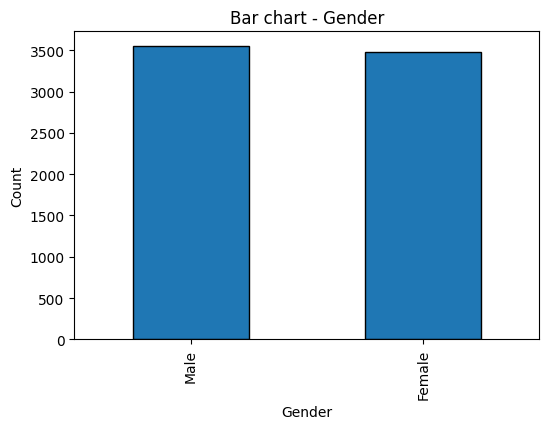

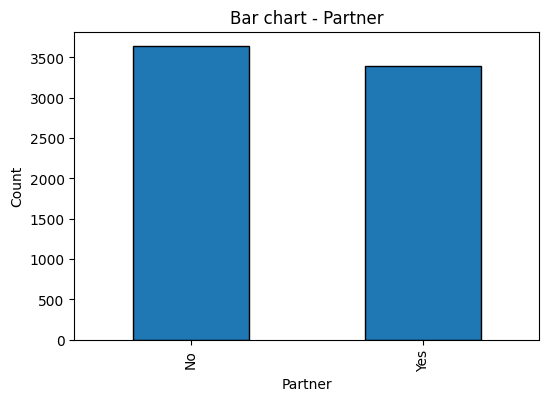

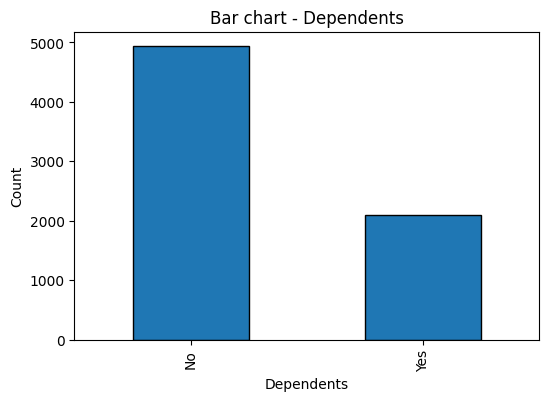

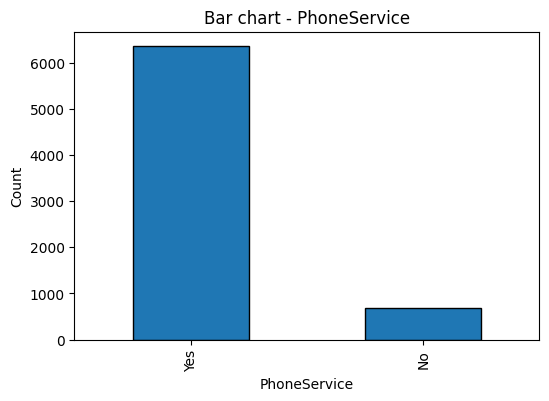

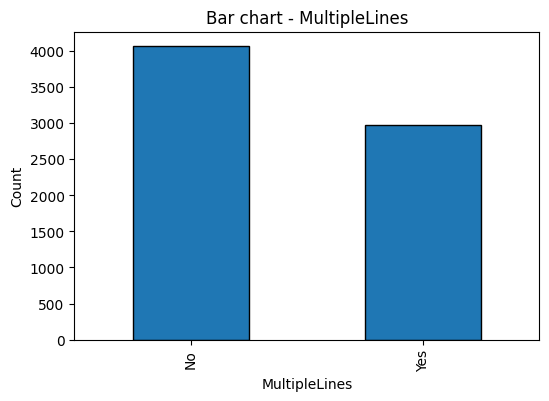

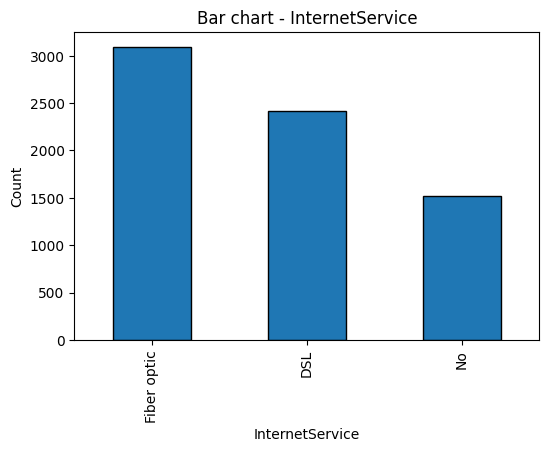

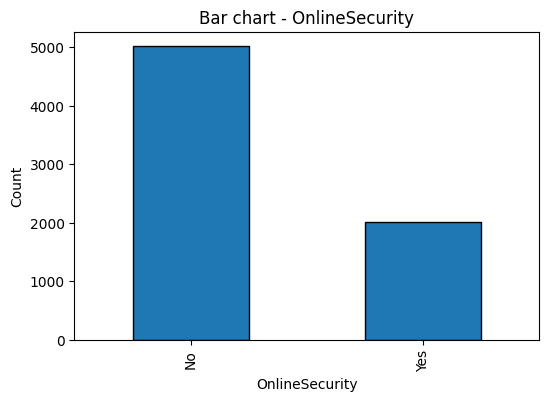

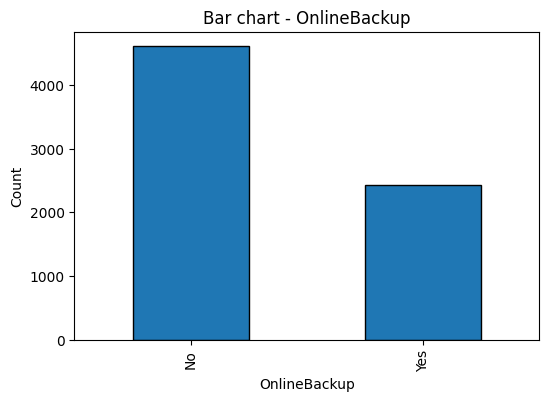

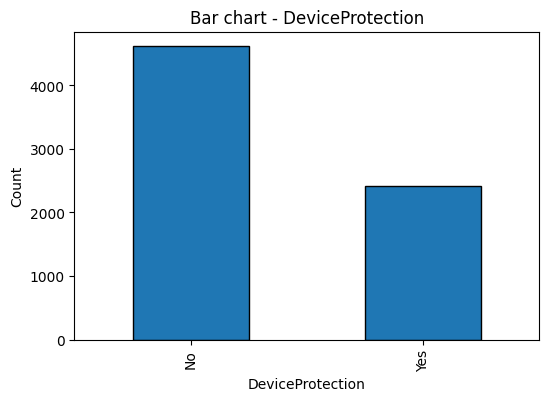

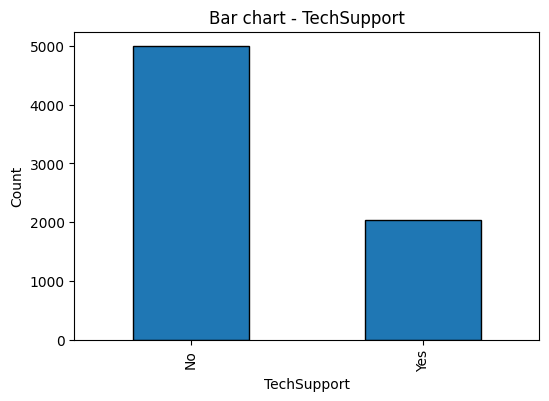

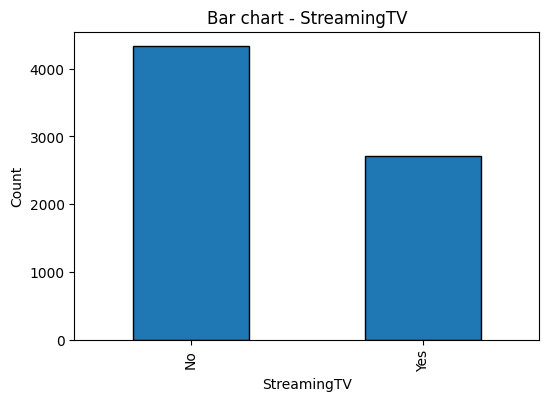

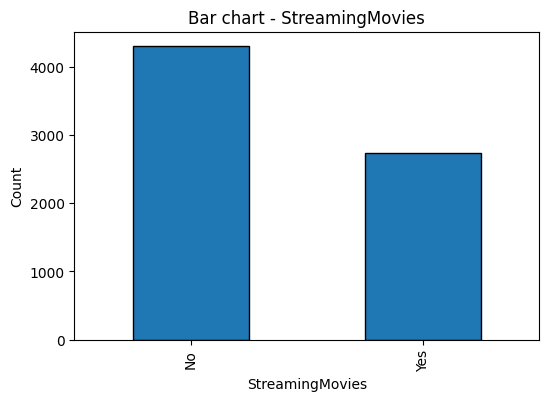

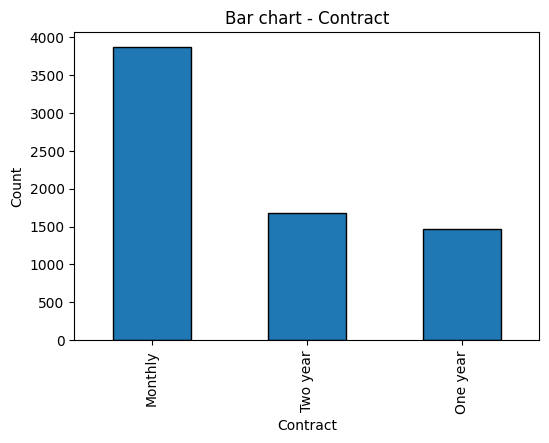

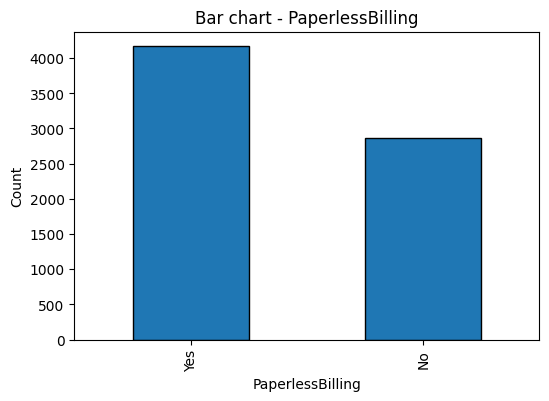

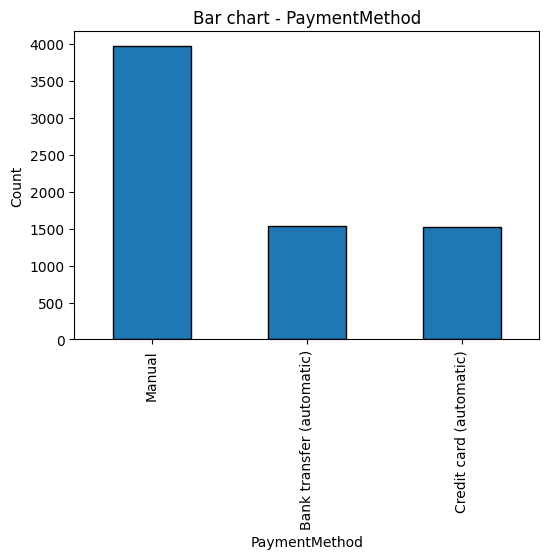

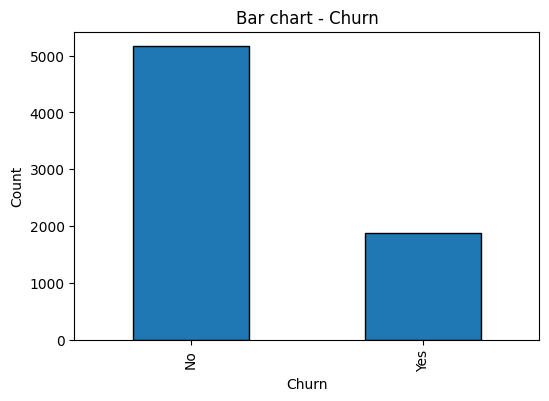

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Bar chart - {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
import plotly.express as px
for cols in num_cols:
 fig= px.histogram(df,x=cols)
 fig.show()

In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [ ]:
gender_churn = df.groupby('Gender')['Churn'].mean().reset_index()
gender_churn.value_counts()

,,count
Gender,Churn,
Female,0.269595,1
Male,0.262046,1


In [ ]:
df["Dependents"]

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [ ]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
cat_cols.drop

<bound method Index.drop of Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')>

In [ ]:
cat_columns=df.select_dtypes(include='object').columns
cat_columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['Churn','SeniorCitizen'])
num_cols

Index(['Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
from google.colab import output
for cols in num_cols:
  fig=px.box(df,x='Churn',y=cols)
  fig.show()

In [ ]:
cat_cols = cat_cols.drop('Churn')

In [ ]:
for col in cat_cols:
    if col == 'Churn':
        continue

    churn_df = df.groupby(col)['Churn'].mean().reset_index()


    fig = px.bar(
        churn_df,
        x=col,
        y='Churn',
        title=f'Churn Rate by {col}',
        labels={col: col, 'Churn': 'Churn Rate'}
    )
    fig.show()


In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [ ]:
#univariate test
#numerical data
#we are going to test it
from scipy.stats import mannwhitneyu

target_col = "Churn"   # your binary column

# Get all numeric columns automatically
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


results = []

for col in num_cols:
    if col == target_col:
        continue

    group1 = df[df[target_col] == df[target_col].unique()[0]][col]
    group2 = df[df[target_col] == df[target_col].unique()[1]][col]

    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

    results.append([col, stat, p])
    # Convert results to a DataFrame for clear display
mw_df = pd.DataFrame(results, columns=["Column", "U_statistic", "P_value"])
print(mw_df)




           Column  U_statistic        P_value
0          Tenure    7154668.0  6.043047e-211
1  MonthlyCharges    3663498.5   8.467195e-54
2    TotalCharges    6288982.0   1.995985e-84


from the Mann-Whitney test we now know that tenure is most signicant then monthly charges then total charges


Next chi square test for categorical values

In [ ]:
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

results = []

for col in cat_cols:
    if col == "Churn":
        continue

    table = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, expected = chi2_contingency(table)
    if p < 0.05:
        significant = "Significant"
    else:
        significant = "Not Significant"

    results.append([col, chi2, p,significant])

chi_df = pd.DataFrame(results, columns=["Column", "Chi2_statistic", "P_value","Significance"])
print(chi_df)


              Column  Chi2_statistic        P_value     Significance
0             Gender        0.475455   4.904885e-01  Not Significant
1      SeniorCitizen      158.440816   2.479256e-36      Significant
2            Partner      157.503151   3.973798e-36      Significant
3         Dependents      186.321639   2.019659e-42      Significant
4       PhoneService        0.873733   3.499240e-01  Not Significant
5      MultipleLines       11.086876   8.694083e-04      Significant
6    InternetService      728.695614  5.831199e-159      Significant
7     OnlineSecurity      205.415787   1.374240e-46      Significant
8       OnlineBackup       47.246659   6.259257e-12      Significant
9   DeviceProtection       30.495699   3.346075e-08      Significant
10       TechSupport      189.966754   3.232868e-43      Significant
11       StreamingTV       27.841910   1.316434e-07      Significant
12   StreamingMovies       25.764141   3.857900e-07      Significant
13          Contract     1179.5458

We are droping the column gender and phone service as they are non significant for prediction


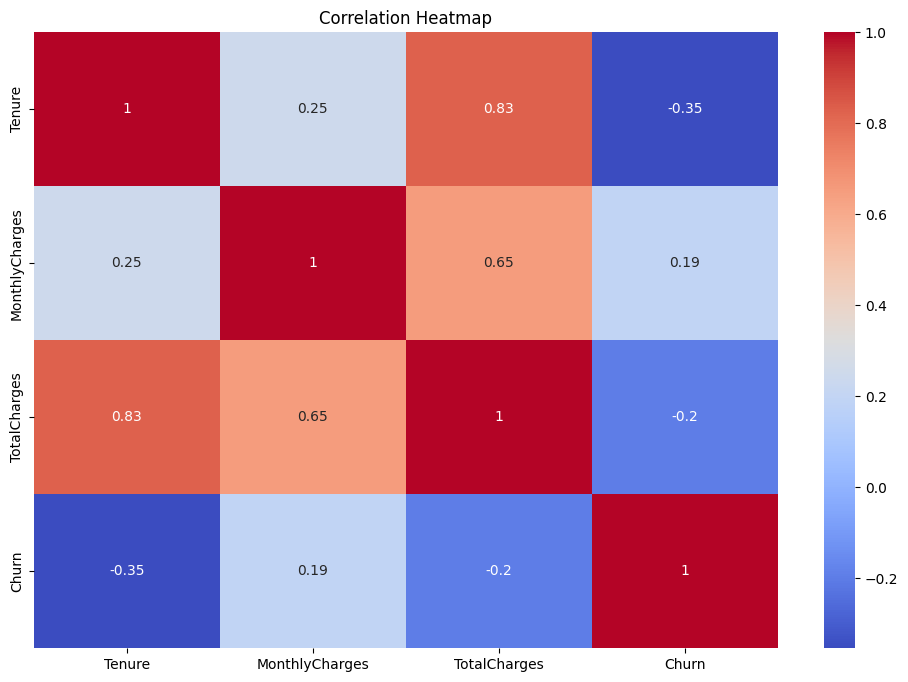

In [ ]:
#multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Here Tenure is too similar to Total charges so we are going to drop total charges

In [ ]:
df.drop(['TotalCharges','Gender','PhoneService'],axis=1,inplace=True)

We are going to do VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numerical columns for VIF
num_df = df.select_dtypes(include=['int64', 'float64']).dropna()

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = num_df.columns
vif_data["VIF"] = [variance_inflation_factor(num_df.values, i)
                   for i in range(num_df.shape[1])]

print(vif_data)

          Feature       VIF
0          Tenure  3.036741
1  MonthlyCharges  4.046759
2           Churn  1.632023


In [ ]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [ ]:
cols=df.columns
for col in cols:
  print(col,df[col].unique())


SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Monthly' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Manual' 'Bank transfer (automatic)' 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn [0 1]


In [ ]:
df


,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,0
1,No,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,0
2,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,1
3,No,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,No,No,No,2,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,0
7039,No,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0
7040,No,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Monthly,Yes,Manual,29.60,0
7041,Yes,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,74.40,1


In [ ]:
#Internet Service
#Contract
#PaymentMethod
#these need binary encoding as it works well with tree models

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and set(df[col].unique()) == {"Yes", "No"}]
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in binary_cols]
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'Churn' in num_cols:
    num_cols.remove('Churn')
print(df)


     SeniorCitizen Partner Dependents  Tenure MultipleLines InternetService  \
0               No     Yes         No       1            No             DSL   
1               No      No         No      34            No             DSL   
2               No      No         No       2            No             DSL   
3               No      No         No      45            No             DSL   
4               No      No         No       2            No     Fiber optic   
...            ...     ...        ...     ...           ...             ...   
7038            No     Yes        Yes      24           Yes             DSL   
7039            No     Yes        Yes      72           Yes     Fiber optic   
7040            No     Yes        Yes      11            No             DSL   
7041           Yes     Yes         No       4           Yes     Fiber optic   
7042            No      No         No      66            No     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection T

In [ ]:
!pip install category_encoders
from sklearn.preprocessing import RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

preprocessor=ColumnTransformer([
    ('num',RobustScaler(),num_cols),
    ('cat',BinaryEncoder(),cat_cols),
    ('binary',OrdinalEncoder(),binary_cols)
],remainder='passthrough')


X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.2,random_state=42)

model=Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',ExtraTreesClassifier(random_state=42))
])

model.fit(X_train,y_train)
# NUMERIC FEATURE NAMES
num_features = num_cols

# BINARY ENCODED CATEGORICAL FEATURE NAMES
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names()

# ORDINAL ENCODED BINARY FEATURES
binary_features = binary_cols

# FINAL FEATURE LIST (in same order as ColumnTransformer output)
feature_names = list(num_features) + list(cat_features) + list(binary_features)

# FEATURE IMPORTANCE
importances = model.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.5 MB/s eta 0:00:00
MonthlyCharges       0.226713
Tenure               0.225220
Contract_0           0.082956
InternetService_1    0.058150
Partner              0.033755
PaperlessBilling     0.031485
Contract_1           0.030655
OnlineBackup         0.030325
OnlineSecurity       0.029057
TechSupport          0.028247
SeniorCitizen        0.028222
DeviceProtection     0.027688
Dependents           0.027010
PaymentMethod_1      0.026727
MultipleLines        0.026163
StreamingMovies      0.025622
PaymentMethod_0      0.024911
StreamingTV          0.023934
InternetService_0    0.013159
dtype: float64


/tmp/ipython-input-2219940986.py:29: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



In [ ]:


df["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
#Need to balance the churn count

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    ("DT", DecisionTreeClassifier(random_state=42)),
    ("RF", RandomForestClassifier(random_state=42)),
    ("XGB", XGBClassifier(eval_metric="logloss", random_state=42))
]

from collections import Counter

print("Before:", Counter(y_train))

# scoring metrics
scoring = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

for model_name, model_estimator in models:

    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={1: 1820}, random_state=24))),
        (model_name, model_estimator)
    ])

    result = cross_validate(
        pipeline, X_train, y_train,
        cv=skf, scoring=scoring,
        return_train_score=True
    )

    print(f"\n📌 MODEL = {model_name}")
    print(f"Train Recall: {result['train_recall'].mean():.4f}")
    print(f"Test Recall:  {result['test_recall'].mean():.4f}")
    print(f"Train Accuracy: {result['train_accuracy'].mean():.4f}")
    print(f"Test Accuracy:  {result['test_accuracy'].mean():.4f}")
    print(f"Train Precision: {result['train_precision'].mean():.4f}")
    print(f"Test Precision:  {result['test_precision'].mean():.4f}")


Before: Counter({0: 4130, 1: 1495})

📌 MODEL = DT
Train Recall: 0.8915
Test Recall:  0.5445
Train Accuracy: 0.9471
Test Accuracy:  0.7456
Train Precision: 0.9077
Test Precision:  0.5208

📌 MODEL = RF
Train Recall: 0.8983
Test Recall:  0.5445
Train Accuracy: 0.9478
Test Accuracy:  0.7881
Train Precision: 0.9047
Test Precision:  0.6154

📌 MODEL = XGB
Train Recall: 0.8408
Test Recall:  0.5672
Train Accuracy: 0.9136
Test Accuracy:  0.7824
Train Precision: 0.8351
Test Precision:  0.5970


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
neg, pos = y_train.value_counts()
scale_pos = neg / pos
# pipline with our final model
steps = [
     ('preprocessing', preprocessor),
     ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={1: 1820}, random_state=24))),
     ("XGB",XGBClassifier( eval_metric='logloss',
        learning_rate=0.05,
        max_depth=6,
        n_estimators=400,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos,
        random_state=42))
]

pipeline = Pipeline(steps= steps)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['Tenure', 'MonthlyCharges']),
                                                 ('cat', BinaryEncoder(),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('binary', OrdinalEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'Tech...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=400,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_proba = pipeline.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold with highest F1 or recall>0.70
best_idx = np.argmax(2 * (precisions * recalls) / (precisions + recalls + 1e-9))
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)


Best Threshold: 0.2989439


In [ ]:
y_pred = (y_proba >= best_threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7157071783937455
Recall: 0.8288770053475936
Precision: 0.47987616099071206
F1: 0.6078431372549019
ROC-AUC: 0.8187305547934213
